In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


df = pd.read_csv('credit_train.csv')

In [6]:
from sklearn.preprocessing import LabelEncoder



df = df.drop(columns=['Loan ID','Customer ID'],errors = 'ignore')


#df = df.fillna(0)   
df['Loan Status'] = df['Loan Status'].fillna('Unknown')
df['Loan Status'] = df['Loan Status'].astype(str)

le = LabelEncoder()
df['Loan Status'] = le.fit_transform(df['Loan Status'])  # Fully Paid=1, Charged Off=0


X = df.drop(columns=['Loan Status'])
y = df['Loan Status']


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

In [ ]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

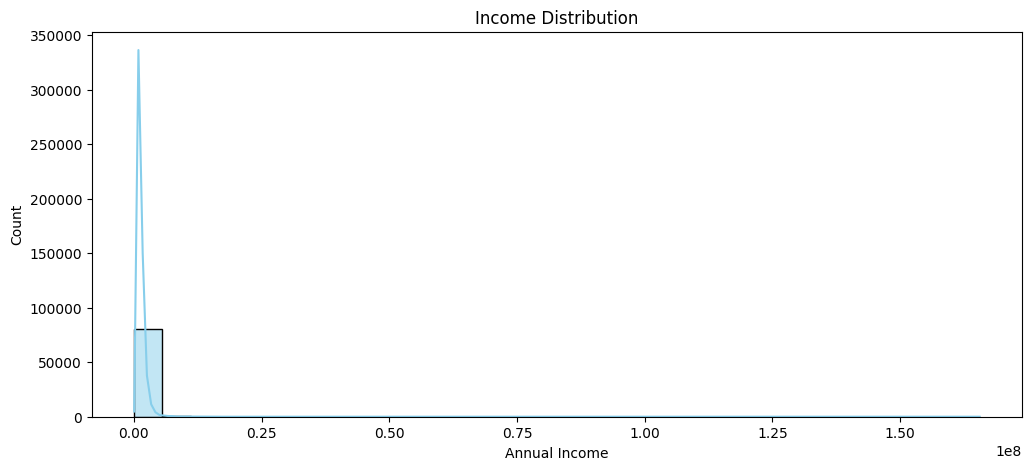

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df['Annual Income'], kde=True, bins=30, color='skyblue')
plt.title("Income Distribution")
plt.show()

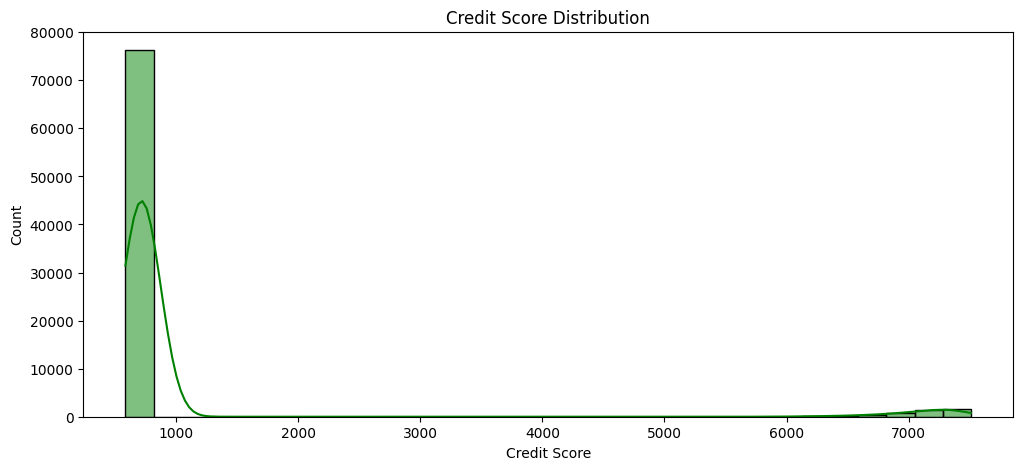

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df['Credit Score'], kde=True, bins=30, color='green')
plt.title("Credit Score Distribution")
plt.show()

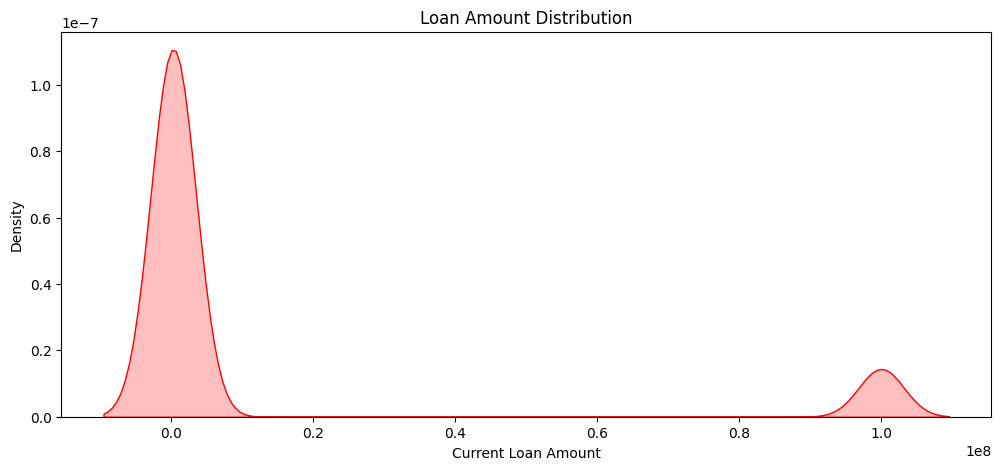

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(df['Current Loan Amount'], fill = True , color='red')
plt.title("Loan Amount Distribution")
plt.show()

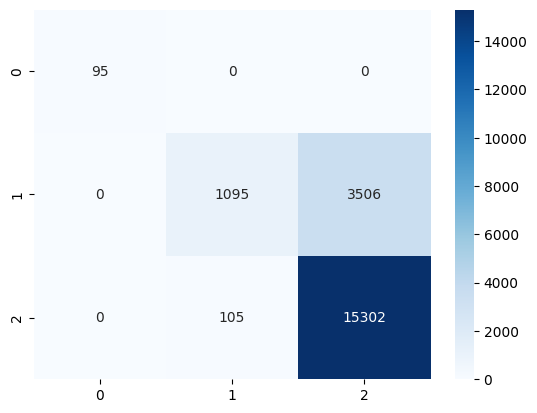

In [9]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d') # 
plt.show()